In [1]:
"""
Purpose: Test the splitting procedure on more double neurons


"""

'\nPurpose: Test the splitting procedure on more double neurons\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")

In [5]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2021-01-01 19:39:29,700 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-01 19:39:29,701 - settings - Setting database.user to celiib
INFO - 2021-01-01 19:39:29,702 - settings - Setting database.password to newceliipass
INFO - 2021-01-01 19:39:29,719 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-01 19:39:29,720 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-01 19:39:29,738 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-01 19:39:29,950 - settings - Setting enable_python_native_blobs to True


In [6]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-01 19:39:30,735 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-01 19:39:30,970 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [10]:
(minnie.Decomposition() & "n_somas>=2" & "n_error_limbs>=3"  
 & "n_same_soma_multi_touching_limbs>=1"
 & "n_multi_soma_touching_limbs >= 2")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135081644023,0,0.25,=BLOB=,853714,1717788,3,2,2,2,12,274,133,9162003.929362295,3242331.927848693,19865.182,145.587,144.967,448.261,414.128,3469,0.00037862895789452617,12.66058394160584,6081924.478,136,0.0005703786708546498,25.507,249007443922.7725,43979761.86664835,27178.272989466423,40942.21242363353,1830937087.6674447,8646.5071
864691135334512105,0,0.25,=BLOB=,1284668,2592422,3,2,2,2,14,392,135,12131472.348390516,4130120.84771535,16856.41,184.141,181.386,515.629,453.603,5554,0.0004578174718204629,14.168367346938776,7910845.395,205,0.0007020741428609351,27.093,364291552257.68677,38879569.205490746,30028.634760562873,46049.636172631435,1777031962.2326183,14128.7911
864691135337716966,0,0.25,=BLOB=,901090,1830584,4,2,2,2,16,317,100,10351773.472658275,2638333.6885507177,17244.394,114.782,114.782,473.125,451.843,3154,0.00030468209223574435,9.949526813880126,6556198.459,145,0.00048107146538103293,21.752,158664860294.77002,31171798.182750065,15327.311857610212,24200.74091518132,1094240415.8260002,9261.2628


In [11]:
segment_id = 864691135337716966

In [13]:
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [16]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# # Preview of How th Neuron Will Need to be Split

In [14]:
multi_soma_limbs = nru.multi_soma_touching_limbs(neuron_obj)
multi_soma_limbs

array([ 1, 10])

In [15]:
multi_touch_limbs = nru.same_soma_multi_touching_limbs(neuron_obj)
multi_touch_limbs

array([0, 5])

In [17]:
total_limbs_to_process = np.unique(np.concatenate([multi_soma_limbs,multi_touch_limbs]))
total_limbs_to_process

array([ 0,  1,  5, 10])

# Doing the Splitting

In [19]:
import proofreading_utils as pru

In [22]:
neuron_obj = neuron.Neuron(neuron_obj)

Recieved another instance of Neuron class in init -- so just copying data


In [30]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"))


 Working on visualization type: mesh

 Working on visualization type: skeleton


multi_soma_limbs = [ 1 10]
multi_touch_limbs = [0 5]


 -------- Working on limb 0------------
Starting combinations to process = [(56, 54)]


---- working on disconnecting 56 and 54
---- This disconnects S0_0 from S0_1  
 Cut iteration 0
Shortest path = [56, 53, 33, 28, 27, 30, 54]
Short segments to combine = [53]


-------- Removing Segments -------------
curr_short_seg_revised = 53
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[805609. 747237. 787163.]
 [806107. 748034. 786720.]]
new_stitch_point = [805858.  747635.5 786941.5]
Angles for [33 52 56 31] are [64.54, 38.27, 25.82, 85.16]
Branch that will absorb mesh of 53 is 56 

-------- Done Removing Segments -------------


Found 1 high degree coordinates to cut
Picking [805858.  747635.5 786941.5] high degree coordinates to cut
coordinate_branches = [31, 33, 52, 56]
31 = red
33 = aqua
52 = purple
56 = green


Angle between 31 and 33 = 121.79 
Angle between 31 and 52 = 61.64 
Angle between 31 and 56 = 74.52 
Angle between 33 and 52 = 78.08 
Angle between 33 and 56 = 63.59 
Angle between 52 and 56 = 47.34 
Final Matches = []
matched_branches_revised = []
Aligned Skeleton Parts


Original graph


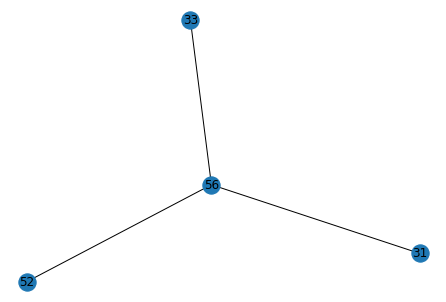

edges_to_delete = [[31 56]
 [33 56]
 [52 56]]
edges_to_create = []
skip_nodes = []
edges_to_delete = [[31 56]
 [33 56]
 [52 56]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {56}
Comp 1 = {2, 9, 10, 11, 31}
Comp 2 = {0, 33, 1, 3, 4, 5, 6, 7, 8, 12, 15, 16, 49, 18, 22, 54, 27, 28, 30}
Comp 3 = {13, 14, 17, 19, 20, 21, 23, 24, 25, 26, 29, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}
Comp 4 = {53}
After get best cut: cut_edges = [array([31, 56]), array([33, 56]), array([52, 56])], added_edges = []
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 5


 -------- Working on limb 1------------
Starting combinations to process = [(81, 62)]


---- working on disconnecting 81 and 62
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Shortest path = [81, 65, 61, 62]
Short segments to combine = []
Found 2 high degree coordinates to cut

Angle between 24 and 61 = 95.4 
Angle between 24 and 62 = 70.23 
Angle between 24 and 63 = 83.08 
Angle between 61 and 62 = 87.23 
Angle between 61 and 63 = 114.93 
Angle between 62 and 63 = 150.84 
Final Matches = []
matched_branches_revised = []
Aligned Skeleton Parts


Original graph


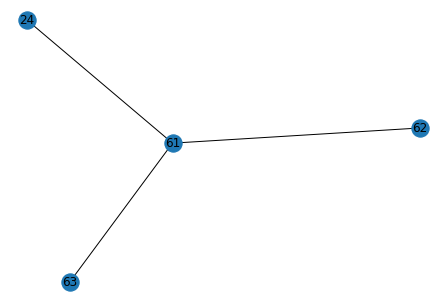

edges_to_delete = [[24 61]
 [61 62]
 [61 63]]
edges_to_create = []
Skipping endnode 62 because skeletal distance was 353.01117056824927 and threshold was 2500
skip_nodes = [62]
edges_to_delete = [[24 61]
 [61 62]
 [61 63]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Comp 1 = {24, 21, 15}
Comp 2 = {62}
Comp 3 = {66, 67, 82, 83, 86, 87, 63}
After get best cut: cut_edges = [array([24, 61]), array([61, 62]), array([61, 63])], added_edges = []
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4


 -------- Working on limb 5------------
Starting combinations to proce

Angle between 1 and 2 = 143.67 
Angle between 1 and 6 = 147.5 
Angle between 1 and 7 = 47.37 
Angle between 1 and 9 = 32.89 
Angle between 2 and 6 = 170.27 
Angle between 2 and 7 = 40.35 
Angle between 2 and 9 = 5.54 
Angle between 6 and 7 = 48.23 
Angle between 6 and 9 = 12.66 
Angle between 7 and 9 = 144.25 
Final Matches = [[1, 9], [2, 9], [6, 9]]
matched_branches_revised = [[2, 9]]
Aligned Skeleton Parts


Original graph


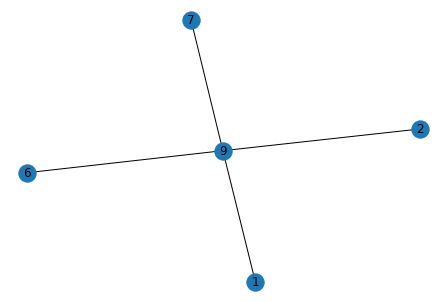

edges_to_delete = [array([1, 9]), array([6, 9]), array([7, 9])]
edges_to_create = []
Skipping endnode 9 because skeletal distance was 2491.2070282863892 and threshold was 2500
Skipping endnode 7 because skeletal distance was 965.2563551875279 and threshold was 2500
skip_nodes = [9, 7]
edges_to_delete = [array([1, 9]), array([6, 9]), array([7, 9])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {9, 2}
Comp 1 = {1}
Comp 2 = {0, 3, 4, 5, 6}
Comp 3 = {7}
Comp 4 = {8}
Comp 5 = {10}
After get best cut: cut_edges = [array([1, 9]), array([6, 9]), array([7, 9])], added_edges = []
 Cut iteration 1
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 6


 -------- Working on limb 10------------
Starting combinations to process = [(2, 1)]


---- working on disconnecting 2 and 1
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Shortest path = [2, 1]
Short segments to combine = []
Found 0 high degree coordinates to cut
skip_nodes 

  Edge: [2 1]: curr_angle = 17.85

Total time for doubling_back = 0.05461883544921875

Attempting the width jump check (attempting from both sides)
  Edge: [2 1]: jump = -137.3
Total time for width = 0.03240156173706055
Path starting at 2 had err_edges: []
  Edge: [1 2]: jump = 137.3
Total time for width = 0.029752016067504883
Path starting at 1 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1


In [29]:
limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=True)

In [25]:
debug

> /meshAfterParty/proofreading_utils.py(472)multi_soma_split_suggestions()
    470 
    471                 if not cut_edges is None:
--> 472                     total_soma_paths_to_cut += cut_edges
    473                 if not added_edges is None:
    474                     total_soma_paths_to_add += added_edges

ipdb> cut_edges
array([[31, 56],
       [33, 56],
       [52, 56]])
ipdb> list(cut_edges)
*** Error in argument: '(cut_edges)'
ipdb> cut_edges.to_list()
*** AttributeError: 'numpy.ndarray' object has no attribute 'to_list'
ipdb> list(cut_edges)
*** Error in argument: '(cut_edges)'
ipdb> c


In [26]:
x = np.array([[1,3],[4,5]])
list(x)

[array([1, 3]), array([4, 5])]